In [20]:
#import tensorflow and keras to use ANN on MNIST Dataset
import tensorflow
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import accuracy_score


In [8]:
#Loading datasets from keras as it has predefined pixel images of around 70,000
(train_x,train_y),(test_x,test_y) = keras.datasets.mnist.load_data()

In [9]:
#checking shape of test sets
test_x.shape


(10000, 28, 28)

In [5]:
test_y.shape

(10000,)

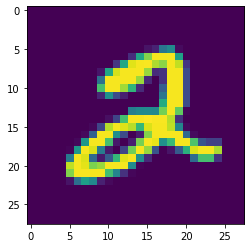

In [11]:
#display image
plt.imshow(train_x[5])

In [12]:
#confining these preset datasets of 255 pixels in line in common range of [0,1] to keep them under the same parameters
train_x = train_x/255
test_x = test_x/255

In [13]:
#look here at train sets
train_x[7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
#General step to create a 3 layer artificial neural network using relu and softmax activation functions by Sequential module of keras
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
#neural network summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Compiling to perform softmax in multiclass clasification along with adam -- a kind of stochastic gradient descent for better accuracy used with sparse_categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
#fitting the mnist model through around 25 different training sets
fitmodel = model.fit(train_x,train_y,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.1752 - val_accuracy: 0.9731
Epoch 2/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.1632 - val_accuracy: 0.9754
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.1770 - val_accuracy: 0.9728
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.1837 - val_accuracy: 0.9733
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.1831 - val_accuracy: 0.9736
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0077 - accuracy: 0.9976 - val_loss: 0.1907 - val_accuracy: 0.9744
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.1780 - val_accuracy:

In [18]:
#model prediction on test sets using the trained model on the training values
probability_y = model.predict(test_x)

In [19]:
#prediction on vertical column axis
prediction_y = probability_y.argmax(axis=1)

In [21]:
#calculation the accuracy of model 
accuracy_score(test_y,prediction_y)

0.9772

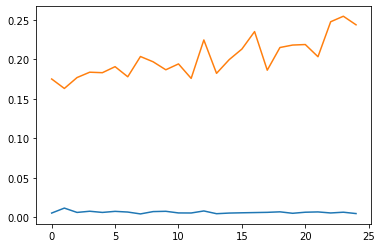

In [24]:
#plotting curve along axis for loss and val_loss
plt.plot(fitmodel.history['loss'])
plt.plot(fitmodel.history['val_loss'])

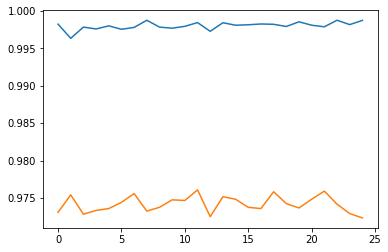

In [25]:
#plotting curve along axis for accuracy and val_accuracy
plt.plot(fitmodel.history['accuracy'])
plt.plot(fitmodel.history['val_accuracy'])

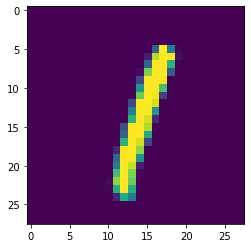

In [27]:
#image prediction using test sets
plt.imshow(test_x[5])

In [28]:
#model prediction results of above image 
model.predict(test_x[5].reshape(1,28,28)).argmax(axis=1)

array([1])